**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a density-based clustering algorithm that discovers clusters of arbitrary shapes and handles noise effectively. Unlike k-means, it doesn't require specifying the number of clusters beforehand.

## Key Concepts

*   **Epsilon (ε):** The radius around a data point to search for neighbors.
*   **Minimum Points (MinPts):** The minimum number of points required within the epsilon radius for a point to be considered a core point.
*   **Core Point:** A data point with at least `MinPts` (including itself) within its ε-neighborhood.
*   **Border Point:** A data point that is within the ε-neighborhood of a core point but has fewer than `MinPts` within its own ε-neighborhood.
*   **Noise Point (Outlier):** A data point that is neither a core point nor a border point.

## Algorithm Steps

1.  Start with an arbitrary data point.
2.  Find all points within its ε-neighborhood.
3.  If a data point has at least `MinPts` within its ε-neighborhood, mark it as a core point and form a new cluster.
4.  Recursively visit all neighbors of the core point. If a neighbor is also a core point, add its neighbors to the cluster.
5.  If a data point is not a core point but is within the ε-neighborhood of a core point, mark it as a border point and assign it to the same cluster.
6.  Data points that are neither core points nor border points are considered noise.

## Choosing ε and MinPts

*   **ε (Epsilon):** One common approach is to use a k-distance graph. Plot the distances to the k-th nearest neighbor (where k is a reasonable estimate for MinPts). The "elbow" in the graph often suggests a good value for ε.
*   **MinPts:** A general rule of thumb is to set MinPts to at least the dimensionality of the data plus 1. Larger values make the algorithm more robust to noise but might miss smaller clusters. MinPts = 1 is equivalent to single-linkage hierarchical clustering.

## Advantages of DBSCAN

*   Doesn't require specifying the number of clusters.
*   Discovers clusters of arbitrary shapes.
*   Handles noise and outliers well.

## Disadvantages of DBSCAN

*   Difficulty with varying densities.
*   Sensitive to parameter selection (ε and MinPts).
*   Can be computationally expensive for very large datasets.

## When to Use DBSCAN

*   When you don't know the number of clusters beforehand.
*   When you expect clusters of arbitrary shapes.
*   When you have noise or outliers in your data.

## When Not to Use DBSCAN

*   When clusters have significantly varying densities.
*   When you have high-dimensional data.
*   When you need a fast clustering algorithm for very large datasets (unless using optimized implementations).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

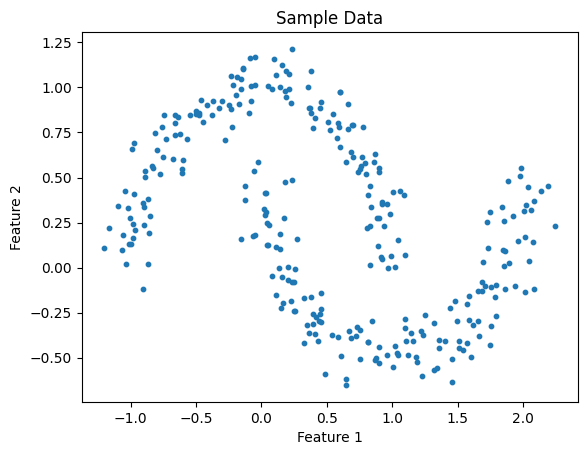

In [ ]:
# Generate synthetic dataset
X, _ = make_moons(n_samples=300, noise=0.09, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

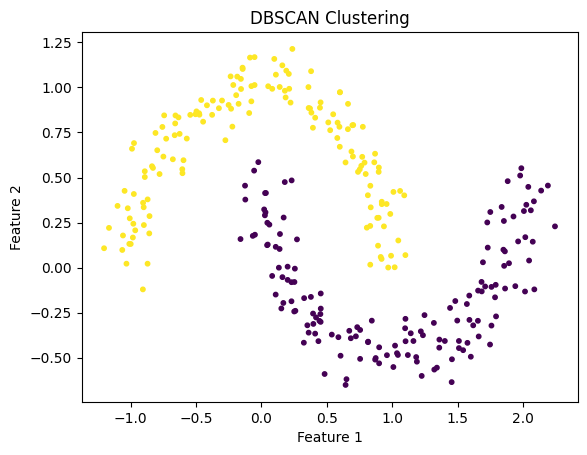

In [ ]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette:.2f}")

# Calculate Davies-Bouldin score
# Davies-Bouldin score is lower for better clustering
if len(set(labels)) > 1:  # Ensure there are more than one cluster
    davies_bouldin = davies_bouldin_score(X, labels)
    print(f"Davies-Bouldin Score: {davies_bouldin:.2f}")
else:
    print("Davies-Bouldin Score: Not applicable (only one cluster or noise)")

Silhouette Score: 0.33
Davies-Bouldin Score: 1.15


**High Davies-Bouldin Index:** Suggests poorly separated clusters or high within-cluster scatter , we can reduce the noise to reduce the Davies-Bouldin Score.

**Low silhouette score:** suggests high within-cluster scatter(means points not close together in a cluster).

**we need to visualize the data to understand the behaviour and then apply different metrics to get the insights. change the minimum points and  distance of a core point for better clusters.**